##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 33***

---

***Full names of all students in the team:
SWARUP KUMAR BHUYAN,
HARIGOVIND R ,
S ANANTH,
ANSHULKUMAR SINGH ,
TIMOTHY ZACHARIAH BINESH***

---

***Id number of all students in the team: 2021A7PS2821H, 2021A7PS2810H , 2021A7PS2809H , 2021A4PS2392H,
2021AAPS2978H***


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

In [754]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [755]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import floor,ceil
import statsmodels.api as sm
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from scipy import stats

In [756]:
df = pd.read_csv('/content/drive/MyDrive/pdata.csv')

In [757]:
# df is the original dataset given to us
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [758]:
# Converting the target attribute into 0 and 1 (binary calssification problem)

df['a21'].replace([1,2],
                        [1,0], inplace=True)

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      1000 non-null   object
 1   a2      1000 non-null   int64 
 2   a3      1000 non-null   object
 3   a4      1000 non-null   object
 4   a5      1000 non-null   int64 
 5   a6      1000 non-null   object
 6   a7      1000 non-null   object
 7   a8      1000 non-null   int64 
 8   a9      1000 non-null   object
 9   a10     1000 non-null   object
 10  a11     1000 non-null   int64 
 11  a12     1000 non-null   object
 12  a13     1000 non-null   int64 
 13  a14     1000 non-null   object
 14  a15     1000 non-null   object
 15  a16     1000 non-null   int64 
 16  a17     1000 non-null   object
 17  a18     1000 non-null   int64 
 18  a19     1000 non-null   object
 19  a20     1000 non-null   object
 20  a21     1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [760]:
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,0


Based on our interpretation, we have 17 categorical features and 3 continuous features at our disposal .
Columns a2(duration) , a5(amount), a13(age) are the three continuous features.

We use bar charts to see how the data is distributed for these categorical columns.



In [761]:
def PlotBarCharts(inpData, colsToPlot):

    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

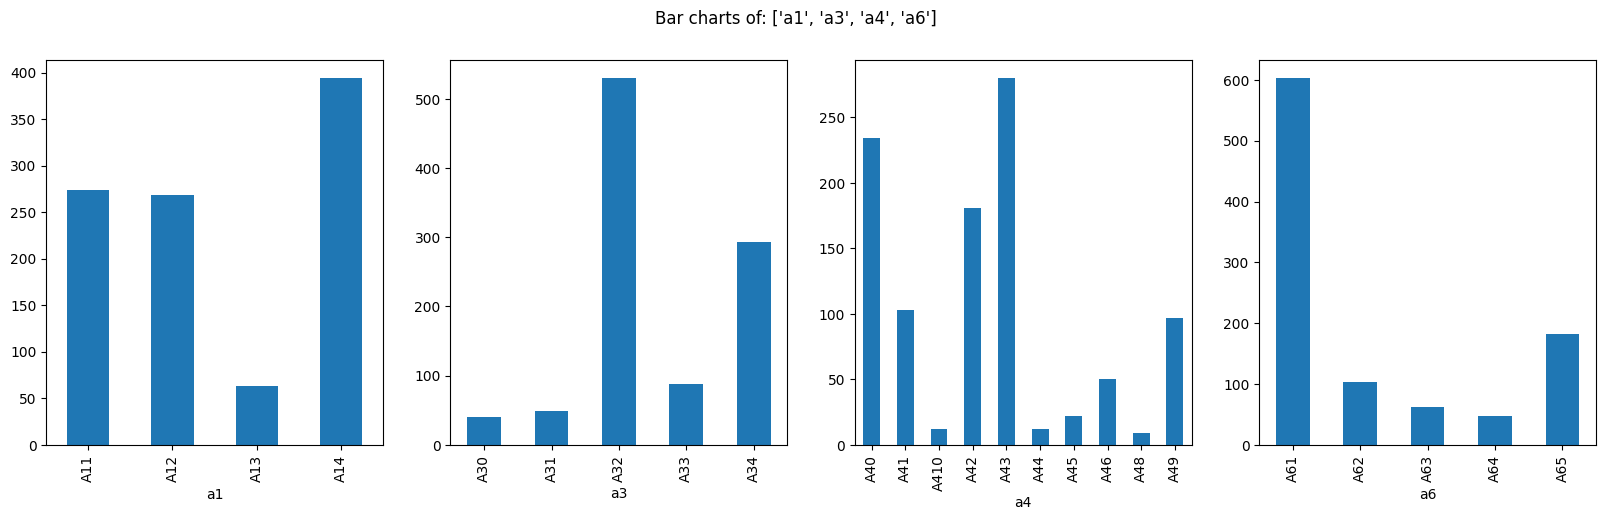

In [762]:
PlotBarCharts(inpData=df,
              colsToPlot=['a1', 'a3', 'a4','a6'])


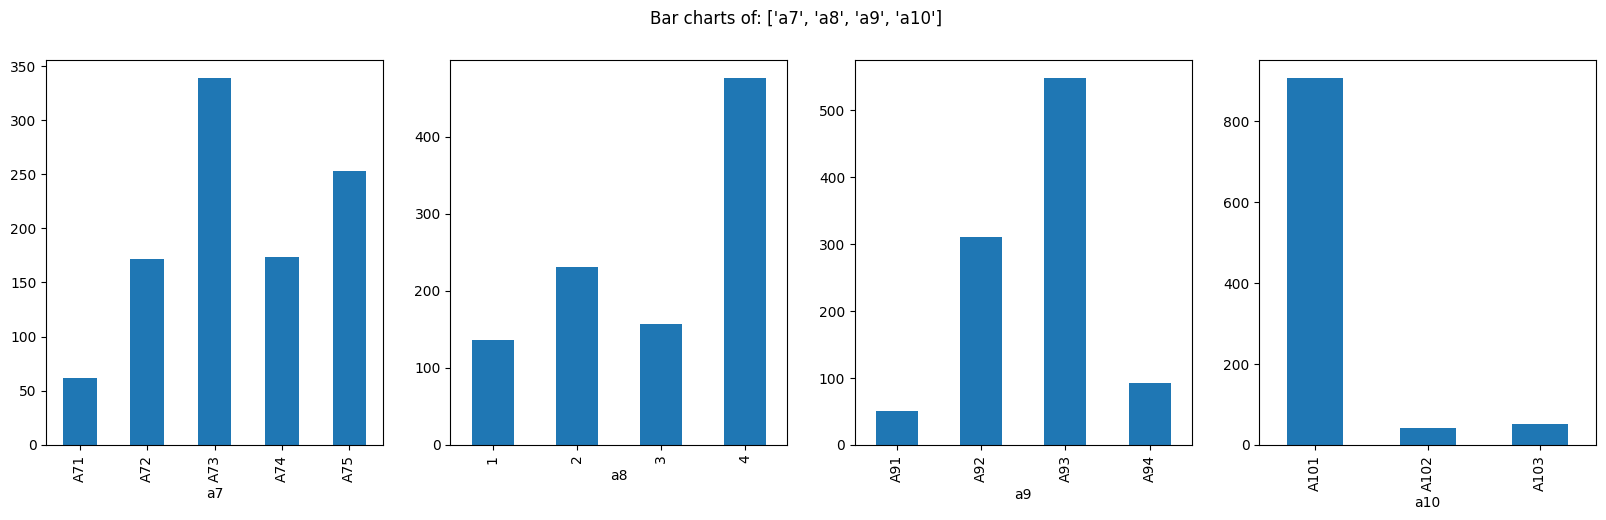

In [763]:
PlotBarCharts(inpData=df,
              colsToPlot=['a7','a8','a9','a10'])


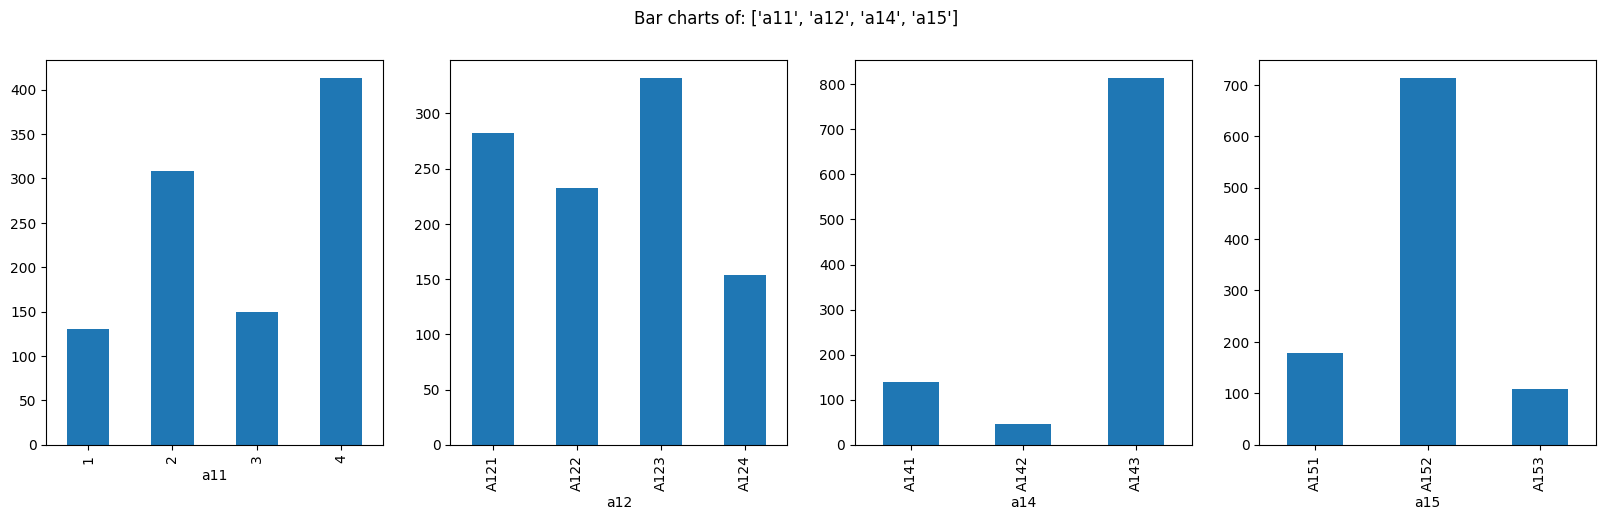

In [764]:
PlotBarCharts(inpData=df,
              colsToPlot=['a11','a12','a14','a15'])


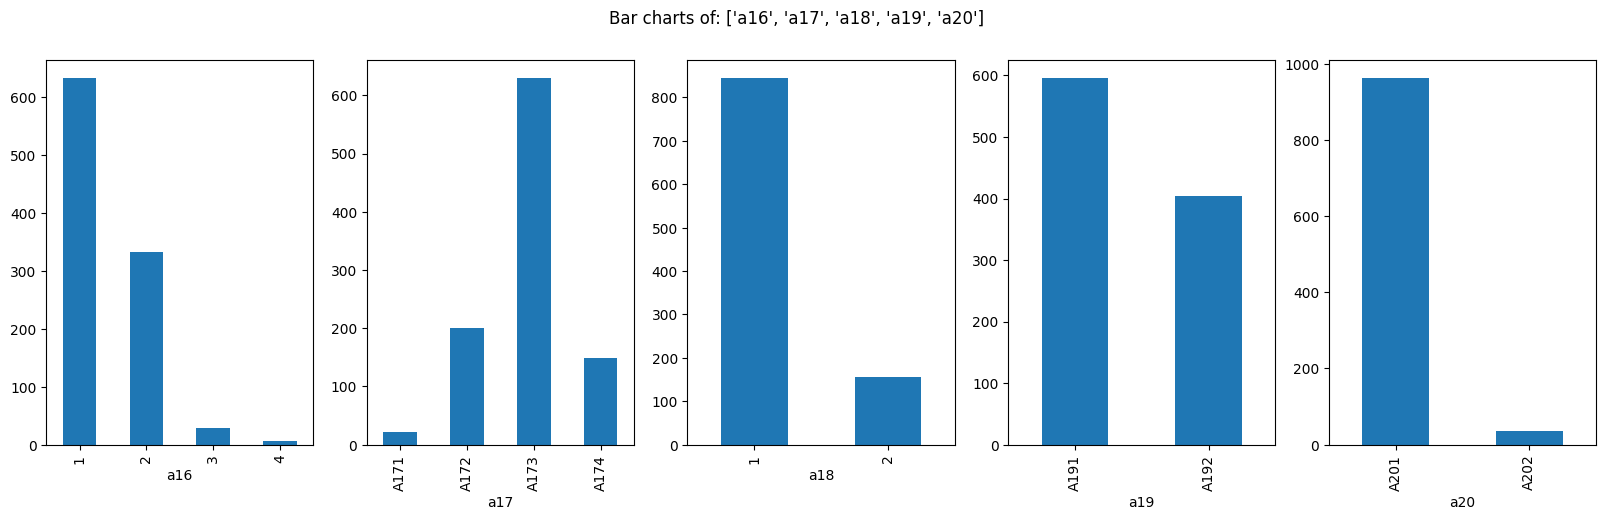

In [765]:
PlotBarCharts(inpData=df,
              colsToPlot=['a16','a17','a18','a19','a20'])


***Atrribute a12, a7 , a8 , a11 give us an ideal kind of bar chart plot
But for attributes a20 and a14 have one kind of category heavily dominating the other categories , so we might look to reconsider them .***

array([[<Axes: title={'center': 'a2'}>, <Axes: title={'center': 'a5'}>],
       [<Axes: title={'center': 'a13'}>, <Axes: >]], dtype=object)

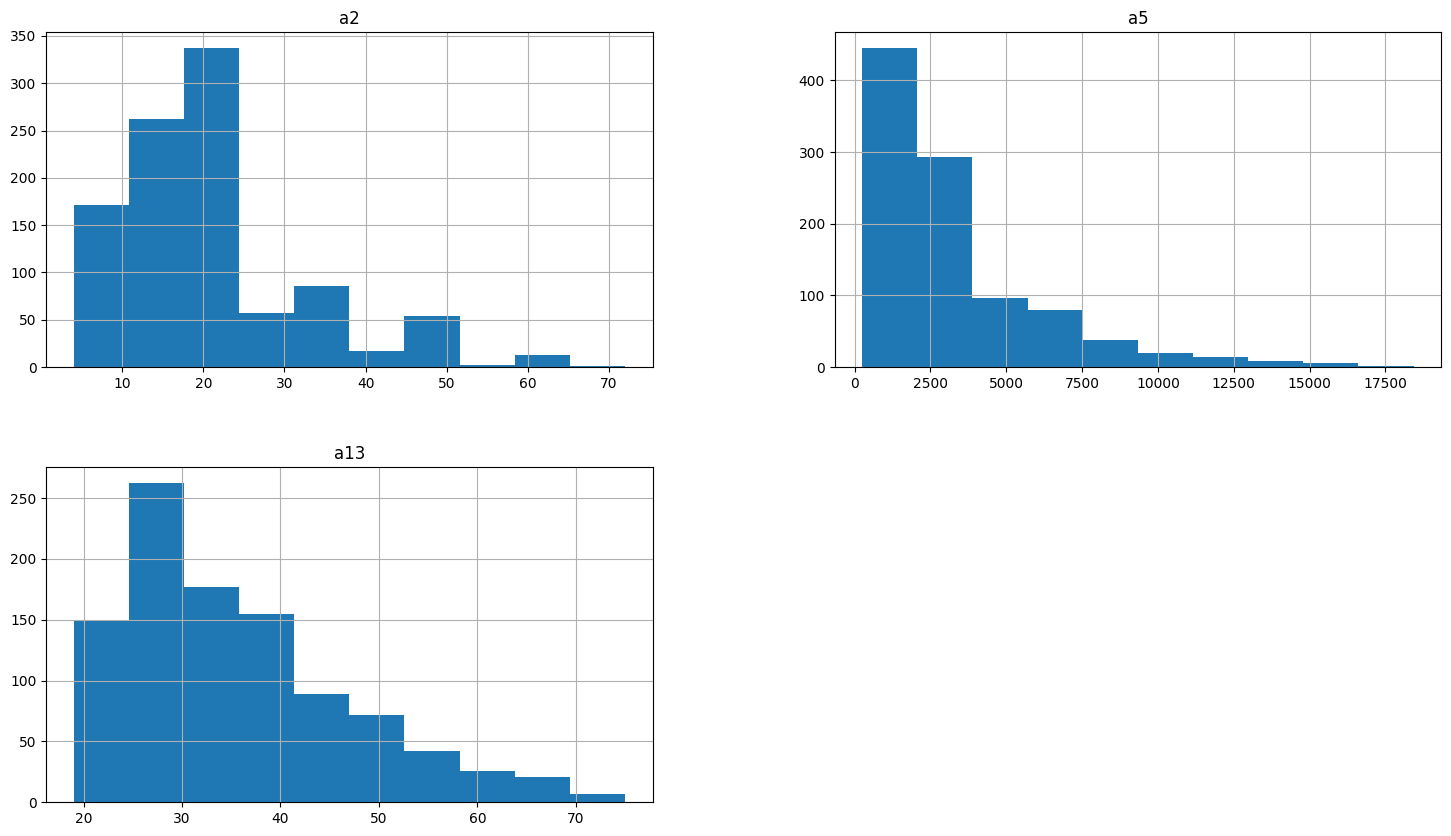

In [766]:
df.hist(['a2', 'a5','a13'], figsize=(18,10))


***All of the continuous variable plots seem to be a bit skewed but these are good to go and we wont be considering any sort of outlier treatments here .
Outlier treatment would have been done if the data was completely skewed or not in Gaussian Distribution***

In [767]:
# Checking for missing values
df.isnull().sum()

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
dtype: int64

No NaN values , so we do not have to perform any imputation for missing values treatment

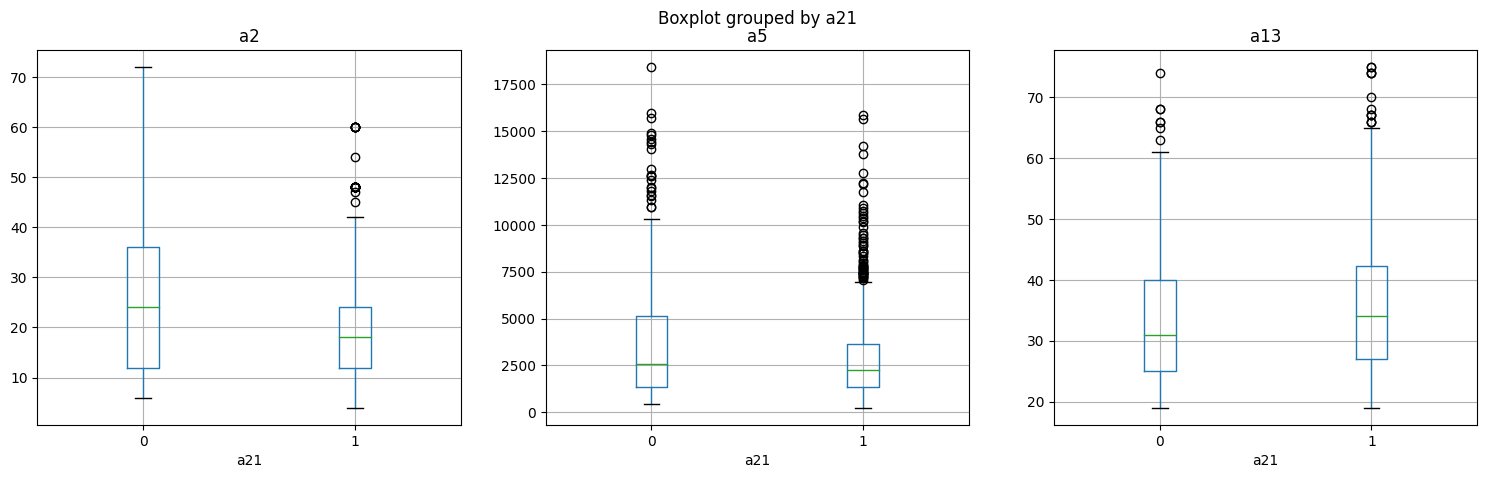

In [768]:
# Box plots for Categorical Target Variable "a21" and continuous features
ContinuousColsList=['a2','a5','a13']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='a21', figsize=(5,5), vert=True, ax=PlotCanvas[i])

*Interpretation*
If the distribution looks similar for each category that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

***Analysis of variance(ANOVA)*** is performed to check if there is any relationship between the given continuous and categorical features

1. *Assumption(H0)*: There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)

2. *ANOVA Test result* : Probability of H0 being true

In [769]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]

    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject null hypothesis
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)


In [770]:
ContinuousVariables=['a2', 'a5','a13']
FunctionAnova(inpData=df, TargetVariable='a21', ContinuousPredictorList=ContinuousVariables)

a2 is correlated with a21 | P-Value: 6.488049877187189e-12
a5 is correlated with a21 | P-Value: 8.797572373533373e-07
a13 is correlated with a21 | P-Value: 0.003925339398278295


['a2', 'a5', 'a13']

So with the ANOVA tests and the obtained p-values , we are going to consider all the continuous features in our classification task .

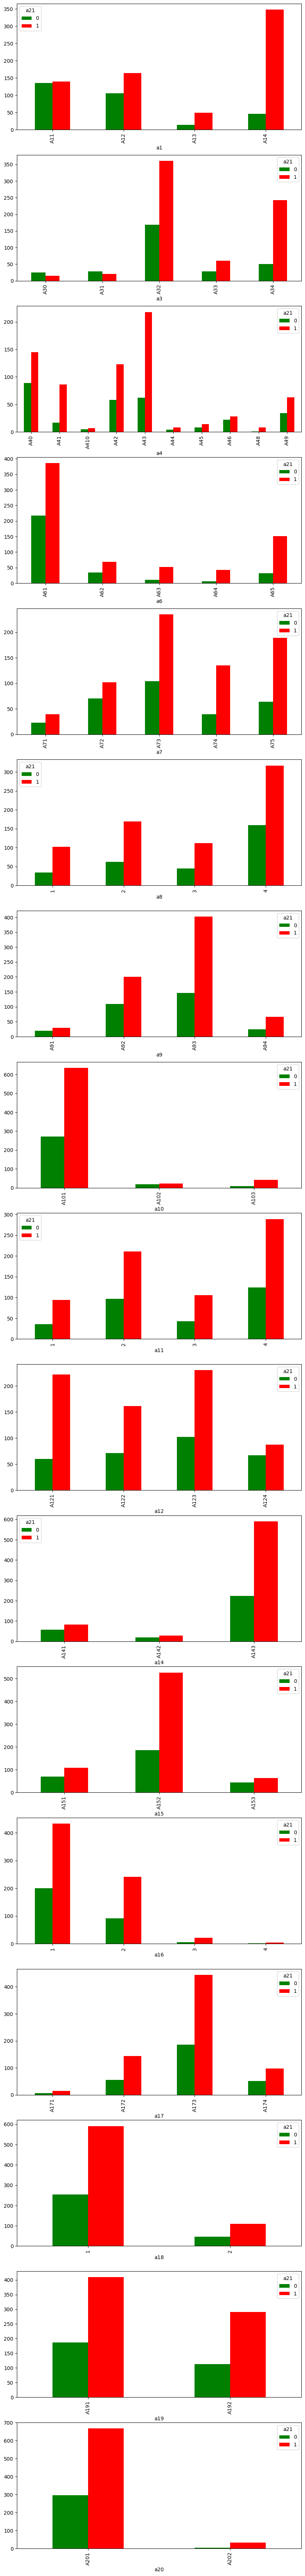

In [771]:
# Visual Inference using Grouped Bar charts
CategoricalColumns=['a1', 'a3', 'a4','a6','a7',
                     'a8', 'a9', 'a10','a11', 'a12',
                     'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColumns), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColumns, range(len(CategoricalColumns))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['a21'])
    CrossTabResult.plot.bar(color=['green','red'], ax=PlotCanvas[i])

### ***Interpretation of Bar Graphs***

1. These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the "a19" Vs "target" plot. The 0 vs 1 ratio for A191 is similar to A192, it means a19 does not affect the Good/Bad Credit!. Hence, *these two variables are not correlated.*

2. On the other hand, look at the "a3" vs "GoodCredit" plot. The number of Bad Credits are very high if a3=A32 and A34. It means history affects the classification . Hence, two columns are correlated with each other.

**We now check statistically how the categorical features are correlated with the target using the Chi-Squared Test**

1. Assumption(H0): The two columns are NOT related to each other
2. Result of Chi-Sq Test: The Probability of H0 being True



In [772]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is Correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT Correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [773]:
CategoricalVariables=['a1', 'a3', 'a4','a6','a7',
                     'a8', 'a9', 'a10','a11', 'a12',
                     'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20']

FunctionChisq(inpData=df,
              TargetVariable='a21',
              CategoricalVariablesList= CategoricalVariables)

a1 is Correlated with a21 | P-Value: 1.2189020722893755e-26
a3 is Correlated with a21 | P-Value: 1.2791872956750918e-12
a4 is Correlated with a21 | P-Value: 0.00011574910079691586
a6 is Correlated with a21 | P-Value: 2.761214238568249e-07
a7 is Correlated with a21 | P-Value: 0.0010454523491402541
a8 is NOT Correlated with a21 | P-Value: 0.1400333122128481
a9 is Correlated with a21 | P-Value: 0.02223800546926877
a10 is Correlated with a21 | P-Value: 0.036055954027247206
a11 is NOT Correlated with a21 | P-Value: 0.8615521320413175
a12 is Correlated with a21 | P-Value: 2.8584415733250017e-05
a14 is Correlated with a21 | P-Value: 0.0016293178186473534
a15 is Correlated with a21 | P-Value: 0.00011167465374597664
a16 is NOT Correlated with a21 | P-Value: 0.4451440800083001
a17 is NOT Correlated with a21 | P-Value: 0.5965815918843431
a18 is NOT Correlated with a21 | P-Value: 1.0
a19 is NOT Correlated with a21 | P-Value: 0.2788761543035742
a20 is Correlated with a21 | P-Value: 0.01583075490285

['a1', 'a3', 'a4', 'a6', 'a7', 'a9', 'a10', 'a12', 'a14', 'a15', 'a20']

***Based on the results of Chi-Square and ANOVA test results , below columns are selected as predictors for our classification task***

a1: Status of existing checking account

a2: Duration in Month

a3: Credit History

a4: Purpose

a5: Credit Amount

a6: Saving Accounts

a7: Employment

a9: Personal Status and Sex

a10: Other Debtors

a12: property

a13: Age

a14: Other Installment Plans

a15: Housing

a20: Foreign Worker  

In [774]:
SelectedColumns=['a1', 'a2','a3', 'a4','a5', 'a6', 'a7', 'a9', 'a10', 'a12', 'a13','a14', 'a15', 'a20']

# finaldata is our final dataset (unnormalized) after performing Feature Selection
finaldata=df[SelectedColumns]
finaldata.head()

,a1,a2,a3,a4,a5,a6,a7,a9,a10,a12,a13,a14,a15,a20
0,A11,6,A34,A43,1169,A65,A75,A93,A101,A121,67,A143,A152,A201
1,A12,48,A32,A43,5951,A61,A73,A92,A101,A121,22,A143,A152,A201
2,A14,12,A34,A46,2096,A61,A74,A93,A101,A121,49,A143,A152,A201
3,A11,42,A32,A42,7882,A61,A74,A93,A103,A122,45,A143,A153,A201
4,A11,24,A33,A40,4870,A61,A73,A93,A101,A124,53,A143,A153,A201


In [775]:
finaldata['a20'].replace({0:1, 1:0}, inplace=True)

# Looking at data after nominal treatment
finaldata.head()

<ipython-input-775-20205a77f12b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata['a20'].replace({0:1, 1:0}, inplace=True)


,a1,a2,a3,a4,a5,a6,a7,a9,a10,a12,a13,a14,a15,a20
0,A11,6,A34,A43,1169,A65,A75,A93,A101,A121,67,A143,A152,A201
1,A12,48,A32,A43,5951,A61,A73,A92,A101,A121,22,A143,A152,A201
2,A14,12,A34,A46,2096,A61,A74,A93,A101,A121,49,A143,A152,A201
3,A11,42,A32,A42,7882,A61,A74,A93,A103,A122,45,A143,A153,A201
4,A11,24,A33,A40,4870,A61,A73,A93,A101,A124,53,A143,A153,A201


In [776]:
finaldata['a1'].replace(['A11', 'A12' , 'A13' , 'A14'],
                        [0,1,2,3], inplace=True)

finaldata['a3'].replace(['A30','A31', 'A32' , 'A33' , 'A34'],
                        [0,1,2,3,4], inplace=True)

finaldata['a4'].replace(['A40','A41', 'A42' , 'A43' , 'A44','A45','A46','A47','A48','A49','A410'],
                        [0,1,2,3,4,5,6,7,8,9,10], inplace=True)

finaldata['a6'].replace(['A61', 'A62' , 'A63' , 'A64','A65'],
                        [0,1,2,3,4], inplace=True)

finaldata['a7'].replace(['A71', 'A72' , 'A73' , 'A74','A75'],
                        [0,1,2,3,4], inplace=True)

finaldata['a9'].replace(['A91', 'A92' , 'A93' , 'A94','A95'],
                        [0,1,2,3,4], inplace=True)

finaldata['a10'].replace(['A101', 'A102' , 'A103'],
                        [0,1,2], inplace=True)

finaldata['a12'].replace(['A121', 'A122' , 'A123' , 'A124'],
                        [0,1,2,3], inplace=True)

finaldata['a14'].replace(['A141', 'A142' , 'A143'],
                        [0,1,2], inplace=True)

finaldata['a15'].replace(['A151', 'A152' , 'A153'],
                        [0,1,2], inplace=True)

finaldata['a20'].replace(['A201', 'A202'],
                        [1,0], inplace=True)


finaldata['a21']=df['a21']

<ipython-input-776-c06c6c1ea43d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata['a1'].replace(['A11', 'A12' , 'A13' , 'A14'],
<ipython-input-776-c06c6c1ea43d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata['a3'].replace(['A30','A31', 'A32' , 'A33' , 'A34'],
<ipython-input-776-c06c6c1ea43d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata['a4'].replace(['A40','A41', 'A42' , 'A43' , 'A44','A45','A46','A4

In [777]:
finaldata.head()

,a1,a2,a3,a4,a5,a6,a7,a9,a10,a12,a13,a14,a15,a20,a21
0,0,6,4,3,1169,4,4,2,0,0,67,2,1,1,1
1,1,48,2,3,5951,0,2,1,0,0,22,2,1,1,0
2,3,12,4,6,2096,0,3,2,0,0,49,2,1,1,1
3,0,42,2,2,7882,0,3,2,2,1,45,2,2,1,1
4,0,24,3,0,4870,0,2,2,0,3,53,2,2,1,0


In [778]:
DataForML_Numeric=finaldata.copy()

In [779]:
finaldata.shape

(1000, 15)

In [780]:
# ndf is the normalized dataset that will be used in further models
ndf=DataForML_Numeric.copy()
ndf['a2'] = (ndf['a2'] - ndf['a2'].mean()) / ndf['a2'].std()
ndf['a5'] = (ndf['a5'] - ndf['a5'].mean()) / ndf['a5'].std()
ndf['a13'] = (ndf['a13'] - ndf['a13'].mean()) / ndf['a13'].std()

In [781]:
ndf.head(10)

,a1,a2,a3,a4,a5,a6,a7,a9,a10,a12,a13,a14,a15,a20,a21
0,0,-1.235859,4,3,-0.744759,4,4,2,0,0,2.765073,2,1,1,1
1,1,2.247070,2,3,0.949342,0,2,1,0,0,-1.190808,2,1,1,0
2,3,-0.738298,4,6,-0.416354,0,3,2,0,0,1.182721,2,1,1,1
3,0,1.749509,2,2,1.633430,0,3,2,2,1,0.831087,2,2,1,1
4,0,0.256825,3,0,0.566380,0,2,2,0,3,1.534354,2,2,1,0
5,3,1.251947,2,6,2.048984,4,2,2,0,3,-0.047998,2,2,1,1
6,3,0.256825,2,2,-0.154551,2,4,2,0,1,1.534354,2,1,1,1
7,1,1.251947,2,1,1.302545,0,2,2,0,2,-0.047998,2,0,1,1
8,3,-0.738298,2,3,-0.075196,3,3,0,0,0,2.237622,2,1,1,1
9,1,0.754386,4,0,0.695333,0,0,3,0,2,-0.663357,2,1,1,0


In [782]:
train_data = ndf.sample(frac=0.80)
test_data = ndf.drop(train_data.index)

unnormal_train_data = finaldata.sample(frac=0.80)
unnormal_test_data = finaldata.drop(unnormal_train_data.index)

X_tr = train_data.drop(columns = "a21")
Y_tr = train_data["a21"]
X_test = test_data.drop(columns = "a21")
Y_test = test_data["a21"]

X_tr=X_tr.values
Y_tr=Y_tr.values
X_test=X_test.values
Y_test=Y_test.values




######################################---------------------##################################



# took separate data splits because of the perceptron algorithm in our case takes classes as 1 or -1
percep_train_data = train_data.copy()
percep_test_data = test_data.copy()

percep_train_data['a21'].replace([1,0],
                        [1,-1], inplace=True)
percep_test_data['a21'].replace([1,0],
                        [1,-1], inplace=True)

X_tr_p = percep_train_data.drop(columns = "a21")
Y_tr_p = percep_train_data["a21"]
X_test_p = percep_test_data.drop(columns = "a21")
Y_test_p = percep_test_data["a21"]

X_tr_p=X_tr_p.values
Y_tr_p=Y_tr_p.values
X_test_p=X_test_p.values
Y_test_p=Y_test_p.values

In [783]:
train_data.shape

(800, 15)

In [784]:
train_data.head()

,a1,a2,a3,a4,a5,a6,a7,a9,a10,a12,a13,a14,a15,a20,a21
292,0,0.256825,4,1,1.115138,0,4,1,0,3,0.743178,2,2,1,1
934,0,-0.738298,2,3,-0.628205,0,2,1,0,2,-1.102900,0,1,1,1
364,0,-0.240737,2,2,-0.282796,0,0,2,0,2,-0.927083,2,1,1,0
612,0,0.008044,2,3,0.030375,3,1,1,0,2,-0.575449,0,1,1,1
659,1,-0.240737,4,2,1.094591,0,4,2,0,3,0.479453,2,1,1,1


In [785]:
percep_train_data.head()

,a1,a2,a3,a4,a5,a6,a7,a9,a10,a12,a13,a14,a15,a20,a21
292,0,0.256825,4,1,1.115138,0,4,1,0,3,0.743178,2,2,1,1
934,0,-0.738298,2,3,-0.628205,0,2,1,0,2,-1.102900,0,1,1,1
364,0,-0.240737,2,2,-0.282796,0,0,2,0,2,-0.927083,2,1,1,-1
612,0,0.008044,2,3,0.030375,3,1,1,0,2,-0.575449,0,1,1,1
659,1,-0.240737,4,2,1.094591,0,4,2,0,3,0.479453,2,1,1,1


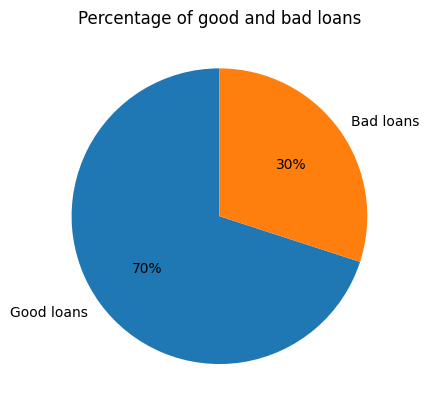

In [786]:
# PLOT showing Distribution of Good and Bad Customers
good_bad_per=round(((df.a21.value_counts()/df.a21.count())*100))
good_bad_per
plt.pie(good_bad_per,labels=['Good loans', 'Bad loans'], autopct='%1.0f%%', startangle=90)
plt.title('Percentage of good and bad loans');

# 2.  **ML MODEL 1(Perceptron)**



Model 1 : PERCEPTRON ALGORITHM

In [787]:
def func(x):
    if x>=0:
        return 1
    else:
        return -1

In [788]:
def train_perceptron(training_set):
    w = np.zeros(15)
    for i in range(2000):
        for training_example in training_set:
            x = np.append(training_example[:-1], 1)
            y = training_example[14]
            if y*func(w.dot(x))<0:
                w = w + y*x
    return w

In [789]:
def evaluate_perceptron(testing_set, w):
    c_mat = np.zeros((2, 2))
    for testing_example in testing_set:
        x = np.append(testing_example[:-1], 1)
        y = testing_example[14]
        if y==1 and func(w.dot(x))==1:
            c_mat[1][1]+=1

        elif y==1 and func(w.dot(x))==-1:
            c_mat[1][0]+=1

        elif y==-1 and func(w.dot(x))==-1:
            c_mat[0][0]+=1

        else:
            c_mat[0][1]+=1

    return c_mat

In [790]:
def accuracy(c_mat):
    return (c_mat[0][0]+c_mat[1][1])/(c_mat[0][0] + c_mat[0][1] + c_mat[1][0] + c_mat[1][1])*100

def precision(c_mat):
    return (c_mat[0][0])/(c_mat[1][0] + c_mat[0][0])*100

def recall(c_mat):
    return (c_mat[1][1])/(c_mat[1][0] + c_mat[1][1])*100


In [791]:
training_set = percep_train_data.to_numpy()
w1 = train_perceptron(training_set)
w1

array([  4.        ,  -7.99622553,   6.        ,   8.        ,
        -8.07143953,   7.        ,   8.        ,   1.        ,
         0.        ,  -1.        ,   1.55158444,   6.        ,
         6.        , -14.        , -25.        ])

In [792]:
testing_set = percep_test_data.to_numpy()
n = evaluate_perceptron(testing_set, w1)
print(n)
print(f"Accuracy: {accuracy(n)}")
print(f"Precision: {precision(n)}")
print(f"Recall: {recall(n)}")

[[ 10.  53.]
 [  5. 132.]]
Accuracy: 71.0
Precision: 66.66666666666666
Recall: 96.35036496350365


In [793]:
n = evaluate_perceptron(train_data.values, w1)
print(n)
print(f"Accuracy: {accuracy(n)}")
print(f"Precision: {precision(n)}")
print(f"Recall: {recall(n)}")

[[  0. 237.]
 [ 12. 551.]]
Accuracy: 68.875
Precision: 0.0
Recall: 97.86856127886323


In [794]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(14,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_tr, Y_tr, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.5978 - accuracy: 0.6750
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7350
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7525
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.7550
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7588
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7613
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7700
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.7713
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7788
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.7775


In [795]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7850


[0.47408515214920044, 0.7850000262260437]

# ***3. ML Model 2 (FLDA)***



In [796]:
def projection_vector(postive_set, negetive_set):
    m1 = positive_set.mean(axis=0)
    m2 = negetive_set.mean(axis=0)

    cov1 = np.zeros((14, 14))
    for x in positive_set:
        cov1 += np.outer(x-m1, x-m1)

    cov2 = np.zeros((14, 14))
    for x in negetive_set:
        cov2 += np.outer(x-m2, x-m2)

    sw = cov1 + cov2
    invsw = np.linalg.inv(sw)

    w = np.matmul(invsw, m2 - m1)
    return w

In [797]:
def discriminant_point(positive_points, negetive_points, w):

    m1 = positive_points.mean()
    m2 = negetive_points.mean()
    s1 = positive_points.std()
    s2 = negetive_points.std()

    a = s2**2 - s1**2
    b = 2*(m2*(s1**2) - m1*(s2**2))
    c = (m1*s2)**2 - (m2*s1)**2
    c -= (s1**2)*(s2**2)*(np.log(((len(positive_points)**2)*s2)/((len(negetive_points)**2)*s1)))
    return ((-1*b) + np.sqrt(b**2 - (4*a*c)))/(2*a)

In [798]:
def func(x, c):
    if x<=c:
        return 1
    else:
        return 0

def evaluate_fld(testing_set, w, c):
    c_mat = np.zeros((2,2))
    for example in testing_set:
        x = example[:-1]
        y = example[14]
        h = func(w.dot(x), c)
        if y==1 and h==1:
            c_mat[1][1]+=1

        elif y==1 and h==0:
            c_mat[1][0]+=1

        elif y==0 and h==0:
            c_mat[0][0]+=1

        else:
            c_mat[0][1]+=1

    return c_mat

In [799]:
def accuracy(c_mat):
    return (c_mat[0][0]+c_mat[1][1])/(c_mat[0][0] + c_mat[0][1] + c_mat[1][0] + c_mat[1][1])*100

def precision(c_mat):
    return (c_mat[0][0])/(c_mat[1][0] + c_mat[0][0])*100

def recall(c_mat):
    return (c_mat[1][1])/(c_mat[1][0] + c_mat[1][1])*100

In [800]:
training_set = train_data.to_numpy()
testing_set = test_data.to_numpy()

positive_set = []
negetive_set = []
for example in training_set:
    if example[14] == 1:
        positive_set.append(example[:-1])
    else:
        negetive_set.append(example[:-1])

positive_set = np.array(positive_set)
negetive_set = np.array(negetive_set)
w = projection_vector(positive_set, negetive_set)
w

array([-7.05171339e-04,  5.07636353e-04, -3.71831703e-04, -2.93176635e-05,
        1.12756538e-04, -2.11799777e-04, -2.51740713e-04, -2.62544009e-04,
       -4.16157862e-04,  3.30147625e-04, -1.34087481e-04, -4.10476820e-04,
       -3.77217191e-04,  5.27786043e-04])

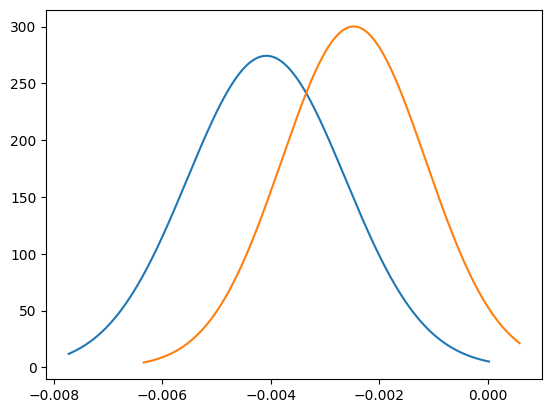

In [801]:
from scipy.stats import norm

positive_points = np.array([w.dot(x) for x in positive_set])
negetive_points = np.array([w.dot(x) for x in negetive_set])

x = np.arange(positive_points.min(), positive_points.max(), 0.00001)
plt.plot(x, norm.pdf(x, positive_points.mean(), positive_points.std()))

x = np.arange(negetive_points.min(), negetive_points.max(), 0.00001)
plt.plot(x, norm.pdf(x, negetive_points.mean(), negetive_points.std()))

In [802]:
c = discriminant_point(positive_points, negetive_points, w)
c

-0.0021943968917157008

In [803]:
c_mat = evaluate_fld(testing_set, w, c)
print(c_mat)
print(f"Accuracy: {accuracy(c_mat)}")
print(f"Precision: {precision(c_mat)}")
print(f"Recall: {recall(c_mat)}")

[[ 30.  33.]
 [ 14. 123.]]
Accuracy: 76.5
Precision: 68.18181818181817
Recall: 89.78102189781022


# ***4. ML Model 3 (Naive Bayes)***

In [804]:
# Calculating P(Y=y) for all possible y

def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [805]:
# Calculate P(X=x|Y=y) using Gaussian distribution

def calculate_likelihood_gaussian(df, feature_name, feature_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feature_name].mean(), df[feature_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feature_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [806]:
def naive_bayes_gaussian(df, X, Y):

    features = list(df.columns)[:-1]
    prior = calculate_prior(df, Y)

    Y_pred = []

    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [807]:
def evaluate(x_tr,y_tr,x_te,y_te,alpha,smooth):
    count=np.zeros((2,2))
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for i in range(len(x_te)):
        pred = naive_bayes_gaussian(x_tr,y_tr,x_te[i],alpha,smooth)
        if y_te[i] == 0 and pred == 0:
          tn += 1
        if y_te[i] == 0 and pred == 1:
          fp += 1
        if y_te[i] == 1 and pred == 0:
          fn += 1
        if y_te[i] == 1 and pred == 1:
          tp += 1

    count[0][0]=tn
    count[0][1]=fp
    count[1][0]=fn
    count[1][1]=tp


    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    F1_score = 2* (precision*recall)/(precision+recall)
    return precision,recall,accuracy,F1_score,count


In [808]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(finaldata, test_size=.2, random_state=41)

X_test111 = test.iloc[:,:-1].values
Y_test111 = test.iloc[:,-1].values
Y_pred111 = naive_bayes_gaussian(train, X=X_test111, Y="a21")

from sklearn.metrics import confusion_matrix, f1_score,accuracy_score

print(confusion_matrix(Y_test111, Y_pred111))
print("Accuracy obtained is : ",accuracy_score(Y_test111, Y_pred111)*100.0,"%")

[[ 44  25]
 [ 29 102]]
Accuracy obtained is :  73.0 %


# ***5. ML Model 4 (Based on research literature)***

The model that we decided to go forward after going through various research papers was the supervised learning classifier : *Kth Nearest neighbours*

In [812]:
class K_Nearest_Neighbors_Classifier() :

	def __init__( self, K ) :
		self.K = K

	def fit( self, X_train, Y_train ) :
		self.X_train = X_train
		self.Y_train = Y_train
		self.m, self.n = X_train.shape

	def predict( self, X_test ) :

		# Performing prediction on the testing dataset
		self.X_test = X_test
		self.m_test, self.n = X_test.shape
		Y_predict = np.zeros( self.m_test )

		# store euclidean dist between test data and all training data points
		for i in range( self.m_test ) :
			x = self.X_test[i]
			neighbors = np.zeros( self.K )
			neighbors = self.find_neighbors(x)
	 		# return most frequent class among k nearest neighbours
			Y_predict[i] = mode( neighbors )[0]
		return Y_predict

	def find_neighbors( self, x ) :
		euclidean_distances = np.zeros( self.m )
		for i in range( self.m ) :
			d = self.euclidean( x, self.X_train[i] )
			euclidean_distances[i] = d
		inds = euclidean_distances.argsort()
		Y_train_sorted = self.Y_train[inds]
		return Y_train_sorted[:self.K]

	# calculating euclidean distance
	def euclidean( self, x, x_train ) :
		return np.sqrt( np.sum( np.square( x - x_train ) ) )


In [813]:
# K=3
df1 = ndf.copy()

# data-split for performing classification
train_k = df1.sample(frac=0.80)
test_k = df1.drop(train_k.index)

X_traink = train_k.drop(columns = "a21")
Y_traink = train_k["a21"]
X_testk = test_k.drop(columns = "a21")
Y_testk = test_k["a21"]

X_traink=X_traink.values
Y_traink=Y_traink.values
X_testk=X_testk.values
Y_testk=Y_testk.values

model = K_Nearest_Neighbors_Classifier(K = 3)
model.fit( X_traink, Y_traink )
Y_predk = model.predict( X_testk )


true_positive = 0

# counter variable
cnt = 0

for cnt in range( np.size( Y_predk ) ) :
	if Y_testk[cnt] == Y_predk[cnt] :
		true_positive += 1
	cnt +=1

print( "Accuracy on test set is	 : ", (true_positive/cnt) * 100 ,"%")

Accuracy on test set is	 :  71.5 %


In [814]:
# k=5

model = K_Nearest_Neighbors_Classifier(K = 5)
model.fit( X_traink, Y_traink )
Y_predk = model.predict( X_testk )


true_positive = 0

# counter variable
cnt = 0

for cnt in range( np.size( Y_predk ) ) :
	if Y_testk[cnt] == Y_predk[cnt] :
		true_positive += 1
	cnt +=1

print( "Accuracy on test set is	 : ", (true_positive/cnt) * 100 ,"%")

Accuracy on test set is	 :  73.0 %


# ***6. Comparison of insights drawn from the models***


***MODEL 1***

1.  We used the *Perceptron Algorithm* which gives us accuracy upto 74% depending on the test-train data split as it is randomized .
2.  To further improve the accuracy , we tried out the ANN using tensorflow just to check how the accuracy improved by adding two more layers .
3. We observe that the accuracy using ANN improved upto 80% . But the problem we faced here is that the data is not good enough and if we increase the iterations upto 100 or 150 , the accuracy can go upto 98% i.e overfitting takes place .
4. This is also in line with the research paper that we mentioned regarding the German Credit Dataset which had an accuracy of 64.4% with Neural Networks


***MODEL 2***


1.   We used Fishers Linear Discriminant Analysis to classify as Good oe Bad Customers
2.   This gave us the best accuracy among the 4 models with accuracy upto 84%.




***MODEL 3***

1. The next Algorithm is Naive Bayes Classifier
2. Here , we converted the continuous features into categorical features and then calculated the probabilities
3. This gave us an accuracy of 73%

***MODEL 4***


1.   Used Kth Nearest Neighbours supervised learning algorithm for classifying our testing data
2.   This gave us an accuracy upto 76% on our test data set
3.  We have performed the classification using K=3 once and K=5.
4.  K=5 gives us more accuracy on our testing dataset.



#    ***Conclusion***

1. First , there were 20 features present along with the target variable.
2. We first converted the nominal and categorical features (given in string to numeric) and then discretized them .
3. Then we performed Feature Selection on continuous and categorical variables separately using statistical methods to choose 14 out of 20 features as these were the features that were correlated with the target attribute .
4. Then we normalized the continuous features of our dataset and proceeded with the classification task .
5. So overall , Fishers Linear Discriminant gave us the most consistent results with almost everytime the accuracies >75% and perceptron performed really poor and one of the reason for this might be the non-linearly separable data .
6. Rest assured , all the accuracies are inline with the research paper's accuracies on various models . We could have used Logistic Regression to improve our accuracy in the case of non-linear data .
7. So , in case we want to deploy one of these four models , FLDA would be the go to choice as it is reeally fast on the high-dimensional data and also gives us good amount of accuracy.

# **_7. References_**

1.   https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data
2. https://www.researchgate.net/publication/2948052_KNN_Model-Based_Approach_in_Classification
3. https://ieeexplore.ieee.org/abstract/document/7324139




